# Cardio Data Analysis

## Contents

* About
    * Project Development
    * Problem Definition
    * Objective
* Data
    * Libraries
    * Importing
    * Variables
    * Important Definitions
* Exploratory Data Analysis (EDA)
    * Plotting Objectives
    * Functions
    * Shape and Size
    * Types
    * Unique Values
    * Missing Values
    * Units Conversion
    * Numeric and Categorical Variables
        * Numeric Variables (both Continuous and Discrete)
            * Summary statistics
            * Probability Distribution
            * Outliers Detection and Treatment & Inconsistencies
        * Categorical Variables
            * Bar Plots
    * Correlation Matrix Heatmap
* Questions

## About

### Project Development
This project was developed locally with Visual Studio Code and GitHub version control.

Please check this project @ [GitHub page](https://caiocvelasco.github.io/) or @ [GitHub Repository - Cardio Data Analysis](https://github.com/caiocvelasco/health-data-analysis/blob/a4fafbcd8148a6d501f42a10ae9d313fc3b268e1/cardio-data-analysis-project.ipynb).

### Problem Definition

A client would like to understand some important patients' cardio-related descriptive statistics.

### Objective
Our goal is to calculate some descriptive statistics.

## Data
Data was already available on a _csv_ format.

### Libraries

In [3]:
# !pip install seaborn pandas matplotlib numpy
import pandas as pd              # for data analysis
import numpy as np               # for scientific computing
import scipy                     # for scientific computing
import scipy.stats as stats      # for scientific computing

import os                        # for file interactions in the user's operating system
import warnings                  # for dealing with warning messages if need be
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns            # for data visualization

### Importing

In [4]:
# Basic Settings
csv_folder_name = "health_dataset"  # please, change the folder name (where the CSV files are stored) if need be
notebook_location = "C:\\Users\\caiov\\OneDrive - UCLA IT Services\\Documentos\\DataScience\\Datasets" # set the location where this notebook is saved
csv_folder_path = notebook_location + "\\" + csv_folder_name  # set path for the CSV files
os.chdir(csv_folder_path)                                     # set location of CSV files

# Save CVSs Data on a Pandas Dataframe
df_cardio_base = pd.read_csv("cardio_base.csv", sep = ",", skipinitialspace = True) #skip space after delimiter if need be
df_cardio_alc  = pd.read_csv("cardio_alco.csv", sep = ";", skipinitialspace = True) #skip space after delimiter if need be

# Save a Copy of the Dataframe
data     = df_cardio_base.copy()
data_alc = df_cardio_alc.copy()

# Dataset Manipulation
data.name = "Cardio Base Dataset" # rename the dataset
cols      = data.columns;              # create an index list with feature names

data_alc.name = "Alcohol Behavior Dataset" # rename the dataset
cols_alc      = data_alc.columns;              # create an index list with feature names

# Quick Overview of a Sample from the Data
pd.set_option('display.max_columns', None) # changing the max_columns value
data.head().T

,0,1,2,3,4
id,0.0,1.0,2.0,3.0,4.0
age,18393.0,20228.0,18857.0,17623.0,17474.0
gender,2.0,1.0,1.0,2.0,1.0
height,168.0,156.0,165.0,169.0,156.0
weight,62.0,85.0,64.0,82.0,56.0
ap_hi,110.0,140.0,130.0,150.0,100.0
ap_lo,80.0,90.0,70.0,100.0,60.0
cholesterol,1.0,3.0,3.0,1.0,1.0
smoke,0.0,0.0,0.0,0.0,0.0


### Important Definitions

Variables may be classified into two main categories: **Numeric** or **Categorical**.

#### Numeric (or Quantitative) variables
A numeric variable is a quantifiable characteristic whose values are numbers (except numbers which are codes standing up for categories). 
* Note: Numeric variables may be either **Continuous** or **Discrete**.

**[Definition]** Continuous variables: Those related to real numbers in mathematics (e.g.: 1.034), which brings the mathematical nature of uncountable infinity, i.e., "an infinite amount of numbers". It is usually expressed as float64 in computer science and is connected the idea of precision. Example: Height, which can be as precise as we want.

**[Definition]** Discrete variables: Those related to integer numbers in mathematics (e.g.: 34), which brings the mathematical nature of finiteness, i.e., "a fixed amount of numbers". It is usually expressed as int64 in computer science. Note that in this case, precision has no meaning. Example: Age, in which precision has no meaning.

#### Categorical (or Qualitative) variables
A Categorical variable refers to a characteristic that can’t be quantifiable.
* Note: Categorical variables can be either **Nominal** or **Ordinal**.

**[Definition]** Nominal variables: is one that describes a name, label or category without natural order. Example: Gender.

**[Definition]** Ordinal variables: An ordinal variable is a variable whose values are defined by an order relation between the different categories. Example: Rating System (excellent, good, bad).

### Variables

Let's take a closer look at the variables and their documentation.

| Feature                  | Variable Type (broad)  | Variable Type (specific) | Variable    | value type |
|:-------------------------|:-----------------------|:-------------------------|:------------|:-----------|
| Unique ID                | Categorical Variable   | Ordinal Variable         | id          | int
| Age                      | Numeric Variable       | Discrete Variable        | age         | int (days)
| Gender                   | Categorical Variable   | Nominal Variable         | gender      | int (binary)
| Height                   | Numeric Variable       | Continuous Variable      | height      | int (cm)
| Weight                   | Numeric Variable       | Continuous Variable      | weight      | float (kg)
| Systolic blood pressure  | Numeric Variable       | Continuous Variable      | ap_hi       | int
| Diastolic blood pressure | Numeric Variable       | Continuous Variable      | ap_lo       | int
| Cholesterol              | Categorical Variable   | Ordinal Variable         | cholesterol | int (1: normal, 2: above normal, 3: well above normal)
| Smoking                  | Categorical Variable   | Nominal Variable         | smoke       | int (binary)

In [5]:
# Store the relevant Categorical Variables for analysis on a list
cat_cols = ['gender', 'cholesterol', 'smoke']

# Store the relevant Numeric Variables for analysis on a list
num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']     


## Exploratory Data Analysis (EDA)

### Plotting Objectives
Before diving into the EDA, it is good to have a clear goal in mind. Our goal is to calculate some descriptive statistics.

Given our goal, the following points should help explore and visualize data accordingly:
 * Check features and their distributions, unidimensionally.
 * Check correlation between features, bidimensionally.

### Defining Functions for EDA

In [6]:
### DATA ANALYSIS PART ###

# Checking Shape
def data_shape(data):
    print("Dataset shape: " + str(data.shape[0]) + " observations and " + str(data.shape[1]) + " features.")

# Check Size
def data_size(data):
    print("This dataset has a total of: " + str(data.size) + " entries.")

# Check Information
def data_info(data):
    print(data.name)
    print("--------------------------------------")
    data.info()
    print("--------------------------------------")  

# Check for Duplicates
def duplicated_rows(data):
    print("There are: " + str(data.duplicated(keep='first').sum()) + " duplicated observations (not including first unique ocurrence).")

# Get Unique Values - Relevant Categorical Variables
def unique_values(data, columns_list):                      # define a function (output: unique values for categorical variables on the numeric format 'int')
    for i in columns_list:                                   # cols is the list of features from this dataset defined in the section above
        print('Unique values in', i, 'are', data[i].unique()) # calls function unique() to find get unique values
        print('----------------------------------------------------------------------------------------------------')

# Check for Missing Values
def missing_values(data):
    print('Checking for missing values in the', data.name) # data.name has been defined previously in the "Importing" section
    print('------------------------------------------------------------')
    print(data.isna().sum())
    print('------------------------------------------------------------')

# Save Data - Numeric & Continuous Variables
def save_num_data(data, columns_list):
    num_data = data[columns_list]
    num_data.name = "Cardio Base Dataset - Numerical Variables" # rename the dataset
    return num_data
    
# Save Data - Relevant Categorical Variable
def save_cat_data(data, columns_list):
    cat_data = data[columns_list]
    cat_data.name = "Cardio Base Dataset - Categorical Variables" # rename the dataset
    return cat_data

# IQR Method - Detecting Outliers
def iqr_method(potential_outliers, data): #arg 1 takes list of features with potential outliers, arg2 
    i = 1
    for col in potential_outliers:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        print(f'column {i}: {data[col].name}\n------------------------')
        print('1st quantile => ',Q1)
        print('3rd quantile => ',Q3)
        print('IQR =>',IQR)

        lower_bound  = Q1-(1.5*IQR)
        print('lower_bound => ' + str(lower_bound))

        upper_bound = Q3+(1.5*IQR)
        print('upper_bound => ' + str(upper_bound))
        print("\n------------------------")
        
        i = i + 1

        data[col][(data[col] < lower_bound) | (data[col] > upper_bound)] = np.nan  # replacing outliers with NaN

# Outliers Method - For Height and Weight
def bound_method(data):
    for col in data:
        data[col][ (data[col] > data[col].quantile(0.975)) | (data[col] < data[col].quantile(0.025))] = np.nan  # replacing outliers with NaN

# Unstack Rank Correlation Matrix (Spearman) and get Top N Correlations
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

### VISUALIZATION PART ###

# Plot Probability Distributions - Continuous Variables
def pdf_plot_cont(data):
    for i in data:
        ax = sns.displot(data[i], kind="kde")
        plt.show()

# Plot Bar Plots - Categorical Variables (and order by value_counts within them)
def bar_plot_cat(data):
    plt.figure(figsize=(5,4))
    for i in data:
        ax = sns.countplot(x = data[i], order = data[i].value_counts().index)
        plt.show()

# Plot Box Plots - Continuous Variables with Groups
def box_plot(data): # the first argument takes a list of features and the second the dataset
    for i in data:
        ax = sns.boxplot(x = data[i], orient = 'h')
        plt.show()

### Shape and Size

In [7]:
# Check Shape and Size
data_shape(data) # calls shape function
data_size(data)  # calls size function

Dataset shape: 70000 observations and 9 features.
This dataset has a total of: 630000 entries.


### Types

In [8]:
# Check Data Type
data_info(data) # calls info function

Cardio Base Dataset
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB
--------------------------------------


All features have the expected type, but height, which should be interpreted as float.

Notice that all non-null counts are the same, so the dataset does not seem to have missing values. 

However, it is always good to check whether discrete variables have the expected values. These are: __gender, cholesterol, smoke__. 

For that, we will look into _Unique values_.

In [9]:
# Converting height, ap_hi, and ap_lo types from int to float
data['height'] = data['height'].astype('float64')
data['ap_hi']  = data['ap_hi'].astype('float64')
data['ap_lo']  = data['ap_lo'].astype('float64')

# Check new type for Height
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  float64
 6   ap_lo        70000 non-null  float64
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 4.8 MB


### Duplicated Values
Let's check for duplicated observations.

In [10]:
# Check for duplicates
duplicated_rows(data)

There are: 0 duplicated observations (not including first unique ocurrence).


### Unique Values
Let's take a closer look into the discrete variables.

In [11]:
# Check for Unique Values on Categorical Variables
unique_values(data, cat_cols) # calls unique values function

Unique values in gender are [2 1]
----------------------------------------------------------------------------------------------------
Unique values in cholesterol are [1 3 2]
----------------------------------------------------------------------------------------------------
Unique values in smoke are [0 1]
----------------------------------------------------------------------------------------------------


All indicator variables the expected values. There are no inconsistent values.

### Missing Values

In this dataset, there is no missing values in the N/A format.

In [12]:
# Check for missing values (before treating for outliers)
missing_values(data) # calls missing values function

Checking for missing values in the Cardio Base Dataset
------------------------------------------------------------
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
dtype: int64
------------------------------------------------------------


### Units Conversion

Checking whether theer is a need for unit conversion in the given features.

The variable age is in days, so we need to convert it to years and round it down, as requested. The other variables are okay.

In [13]:
# Converting Age from days to years .apply(np.floor)
data['age_years_float'] = (data['age'] / 365)
data['age']       = (data['age'] / 365).apply(np.floor).astype(int)

# Quick overview of age conversion
print("Check old and new features:")
print(data[['age', 'age_years_float']].sample(5))

# Drop unecessary features
print("\nCheck new dataset with new values for the Age feature:")
data = data.drop(columns = 'age_years_float')

# Quickly check new data
data.head()

Check old and new features:
       age  age_years_float
16322   59        59.923288
10825   57        57.936986
43571   63        63.649315
27791   60        60.380822
4519    52        52.082192

Check new dataset with new values for the Age feature:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50,2,168.0,62.0,110.0,80.0,1,0
1,1,55,1,156.0,85.0,140.0,90.0,3,0
2,2,51,1,165.0,64.0,130.0,70.0,3,0
3,3,48,2,169.0,82.0,150.0,100.0,1,0
4,4,47,1,156.0,56.0,100.0,60.0,1,0


### Numeric and Categorical Variables

In [14]:
# Save numeric dataset into a new dataset for later use
num_data = save_num_data(data, num_cols) # calls save_num_data function and stores output

# Quick Overview
num_data.sample(5)

,age,height,weight,ap_hi,ap_lo
31167,39,170.0,110.0,150.0,1000.0
29182,57,155.0,69.0,140.0,90.0
27047,41,173.0,60.0,120.0,80.0
56492,54,165.0,65.0,140.0,80.0
22095,43,168.0,121.0,140.0,1000.0


In [15]:
# Save categorical dataset into a new dataset for later use
cat_data = save_cat_data(data, cat_cols) # calls save_cat_data function and stores output

# Quick Overview
cat_data.sample(5)

,gender,cholesterol,smoke
45177,1,1,0
21194,1,1,0
28765,2,1,0
41704,2,1,1
16488,1,1,0


### Numeric Variables

In this section, we will check whether the most common statistics makes sense for the Numeric Variables. We'll check the max and min values. We'll also check for outliers.

#### Summary Statistics

In [16]:
# Summary Statistics - Numerical Variables
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,52.840671,6.766774,29.0,48.0,53.0,58.0,64.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0


#### Probability Distributions

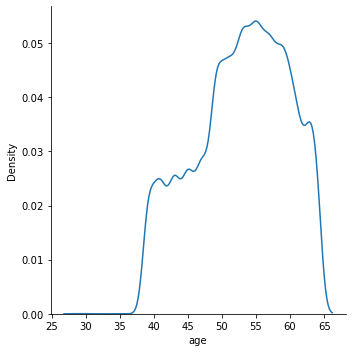

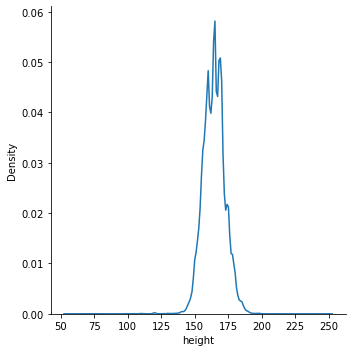

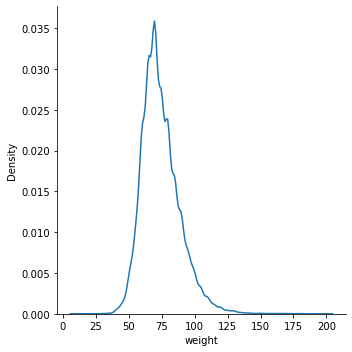

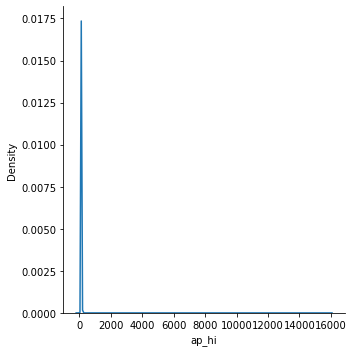

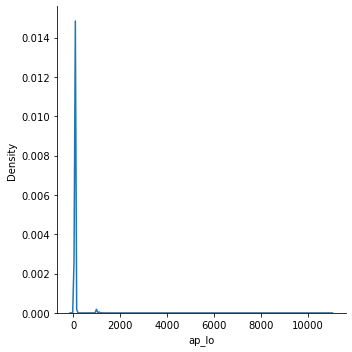

In [17]:
#### Probability Distributions (PDFs) - Numerical Variables
pdf_plot_cont(num_data) # calls pdf plot function

Some features are strongly skewed to the right, let's focus on those. They are: **ap_hi, ap_lo**.

This information is important because it supports the methods we use for:
* Outliers Detection and Treatment

#### Outliers Detection and Treatment & Inconsistencies

Outliers can be found due to variation within the data (i.e., due to an unexpected large variance in a feature) or due to mistakes. Both cases can be dealt with. We started by looking at the probability distribution of those features and we noticed their skewness, which might indicated possible candidate features for outliers. We also looked at the summary statistics which also show unexpected values.

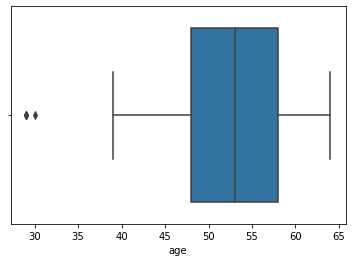

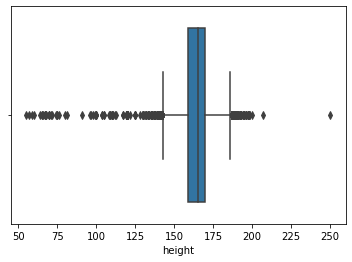

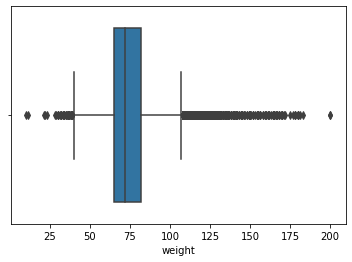

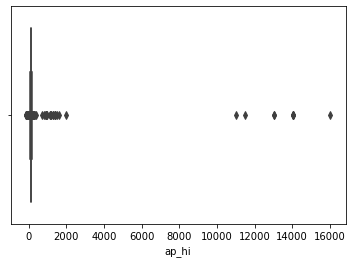

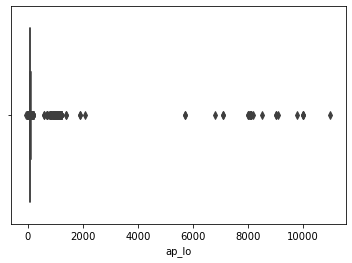

In [18]:
# Boxplots (before treating for outliers) - Numerical Variables
box_plot(num_data)

For Height and Weight, we will use intuition and remove those that fall below 2.5% or above 97.5% of a given range.

For Diastolic and Systolic, we will do the same but we will also correct the cases where diastolic pressure is higher than systolic (because this is not correct) and the cases where blood pressures is negative, which is also incorrect.

In [19]:
# Handling Outliers within a given range
bound_method(data)

In [20]:
# Check whether Diastolic > Systolic
print("Diastilic pressure is higher than systolic one in {0} cases.".format(data[data['ap_lo'] > data['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 0 cases.


In [21]:
# Assign NaN values to ap_lo and ap_hi when this incorrect case of Diastolic > Systolic is true
data['ap_lo'][ data['ap_lo'] > data['ap_hi'] ] = np.nan
data['ap_hi'][ data['ap_lo'] > data['ap_hi'] ] = np.nan

print("Diastilic pressure is higher than systolic one in {0} cases.".format(data[data['ap_lo'] > data['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 0 cases.


In [22]:
# Save New Numeric Dataset without outliers
new_num_data = save_num_data(data, num_cols) # calls save_num_data function and stores output

# Summary Statistics - New Numerical Variables without outliers
new_num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,69996.0,52.842020,6.764616,39.0,48.0,53.0,58.0,64.0
height,67024.0,164.404616,6.942338,150.0,159.0,165.0,169.0,180.0
weight,66897.0,73.715140,12.069034,51.0,65.0,72.0,81.0,108.0
ap_hi,67536.0,126.728412,14.855947,100.0,120.0,120.0,140.0,170.0
ap_lo,68085.0,81.028641,8.784395,60.0,80.0,80.0,90.0,100.0


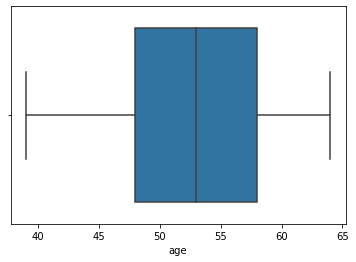

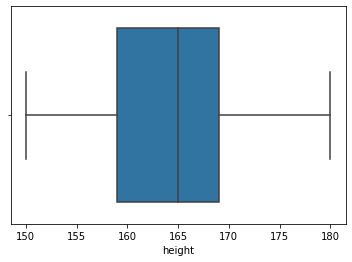

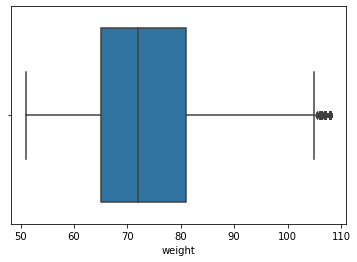

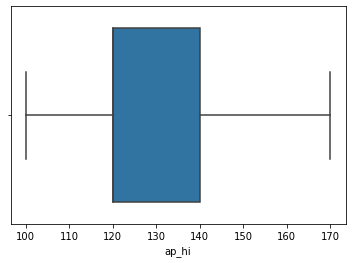

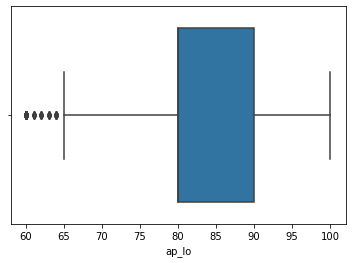

In [23]:
# Boxplots (after treating for outliers) - Numerical Variables
box_plot(new_num_data)

Now we have a dataset that is tidy and where outliers were substituted by missing values. This substitution (rather than dropping observations) is important because we won't miss data on other variables where the outliers were not present. 

Now, both descriptive and inferential statistics can be performed on clean Numeric Variables.

In [24]:
# Check for missing values (after treating for outliers) - Numeric Variables
missing_values(new_num_data) # calls missing values function

Checking for missing values in the Cardio Base Dataset - Numerical Variables
------------------------------------------------------------
age          4
height    2976
weight    3103
ap_hi     2464
ap_lo     1915
dtype: int64
------------------------------------------------------------


Note that these Missing Values are due to the outlier treatment and from the inconsistencies treatment. They would not affect our descriptive statistics because we could account for that.

However, to simplify our analysis, let's drop the rows where any missing values are present.

In [25]:
# Drop rows where at least one Missing values (NaN) in each row is present
data.dropna(inplace = True)

# Save New Numeric Dataset without outliers and without missing values
new_num_data_no_missing = save_num_data(data, num_cols) # calls save_num_data function and stores output

# Save New Categorical Dataset without outliers and without missing values
new_cat_data_no_missing = save_cat_data(data, cat_cols) # calls save_num_data function and stores output

In [26]:
# Check for missing values (after treating and dropping outliers) - Numeric Variables
missing_values(new_num_data_no_missing) # calls missing values function

Checking for missing values in the Cardio Base Dataset - Numerical Variables
------------------------------------------------------------
age       0
height    0
weight    0
ap_hi     0
ap_lo     0
dtype: int64
------------------------------------------------------------


### Categorical Variables

#### Box Plots

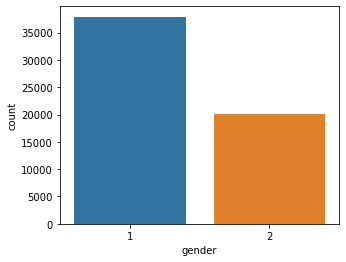

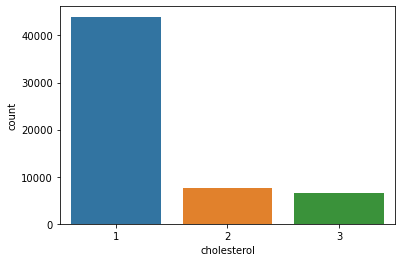

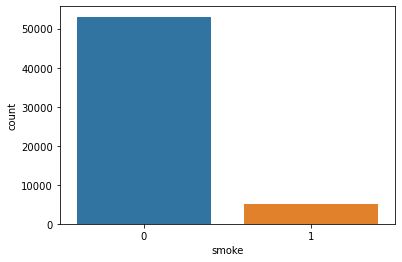

In [27]:
# Bar Plots for the Relevant Categorical Variables
bar_plot_cat(new_cat_data_no_missing)

Categorical variables look okay. No need for any treatment.

In [28]:
# Quick Overview of the New Dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58057.0,49890.705841,27412.239024,2474.0,26112.0,49896.0,73531.0,97472.0
age,58057.0,52.862601,6.739665,39.0,48.0,53.0,58.0,64.0
gender,58057.0,1.347211,0.476087,1.0,1.0,1.0,2.0,2.0
height,58057.0,164.534768,6.846468,150.0,160.0,165.0,169.0,180.0
weight,58057.0,73.505091,11.844130,51.0,65.0,72.0,81.0,108.0
ap_hi,58057.0,126.123895,14.301570,100.0,120.0,120.0,140.0,170.0
ap_lo,58057.0,81.137365,8.327282,60.0,80.0,80.0,90.0,100.0
cholesterol,58057.0,1.354118,0.672122,1.0,1.0,1.0,1.0,3.0
smoke,58057.0,0.086088,0.280496,0.0,0.0,0.0,0.0,1.0


### Correlation Matrix Heatmap

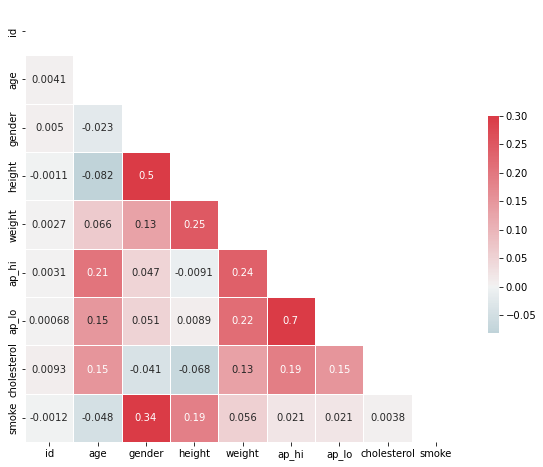

In [29]:
# Heatmap = Correlation among features
corr = data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

## Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 8)) ## set figure
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, annot = True,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5});

## Questions

### Question 01
How much heavier is the age group with the highest average weight than the age group with the lowest average weight?

**ANSWER: 2.63 kg**

To answer this question, we need to group ages into different Age Groups.

My choice for age groups was based on a dataset from the USA, extracted from the WHO (World Health Organization) at https://apps.who.int/healthinfo/systems/surveydata/index.php/catalog/148/data-dictionary/F1?file_name=USA

In [30]:
# Generating Age Groups

# Quick look at the Age Distribution
data[['age']].describe().T

# Create ranges for categories
label_ranges_01 = [30, 39, 49, 59, 69]
label_names_01  = ['30 - 39', '40 - 49', '50 - 59', '60 - 69']

# Create new column with collapsed categories
data['age_group'] = pd.cut(data['age'], bins = label_ranges_01, labels = label_names_01)

# Check if age groups makes sense
data[['age', 'age_group']].sample(5)

,age,age_group
39499,39.0,30 - 39
66209,57.0,50 - 59
17660,59.0,50 - 59
18466,56.0,50 - 59
61890,60.0,60 - 69


In [31]:
# Calculate Average per Age Group (in Ascending Order by Weight) 
stats_dict = {'weight' : 'mean'}
q_01_data = data.groupby('age_group').agg(stats_dict).reset_index().sort_values(by = 'weight', ascending = True)
print(q_01_data)

  age_group     weight
0   30 - 39  71.656783
1   40 - 49  72.698584
2   50 - 59  73.750435
3   60 - 69  74.286801


In [32]:
# Question 01 - Answer
answer_01 = (q_01_data['weight'].max() - q_01_data['weight'].min())
print("The age group with the highest average weight is " + "{:.2f}".format(answer_01) + " Kgs heavier than the age group with the lowest weight")

The age group with the highest average weight is 2.63 Kgs heavier than the age group with the lowest weight


### Question 02
Do people over 50 have higher cholesterol levels than the rest? If so, what is the percentage of that difference?

**ANSWER: Yes, people over 50 have 17.5% higher cholesterol levels than the rest**

In [33]:
# Quick look at the Cholesterol Distribution
data[['cholesterol']].describe().T

# Create ranges for categories
label_ranges_02 = [0, 50, 69]
label_names_02  = ['Age <= 50', 'Age > 50']

# Create new column with collapsed categories
data['partition_50'] = pd.cut(data['age'], bins = label_ranges_02, labels = label_names_02)

# Check if age groups makes sense
data[['age', 'partition_50']].sample(5)

,age,partition_50
32663,52.0,Age > 50
23114,60.0,Age > 50
10245,44.0,Age <= 50
44654,52.0,Age > 50
49746,45.0,Age <= 50


[Text(0, 0, 'Age <= 50'), Text(1, 0, 'Age > 50')]

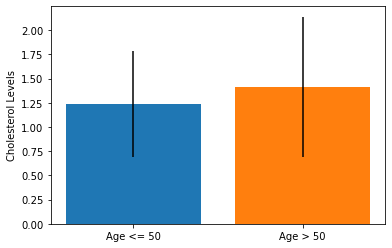

In [34]:
# Question 02 - Answer Part 1 of 2
partition_50 = data['partition_50']
list_unique_items = partition_50.unique()

fig, ax = plt.subplots()
# Loop over the different categories of partition_50
for i in list_unique_items:
  # Extract the rows for a unique item of the list
  new_df = data[ data['partition_50'] == i ]
  # Add a bar for cholesterol mean with std y error bar
  ax.bar(i, new_df["cholesterol"].mean(), yerr = new_df["cholesterol"].std())

ax.set_ylabel("Cholesterol Levels")
ax.set_xticklabels(list_unique_items)


In [35]:
# Calculate the % difference between Ages in the given partition
stats_dict = {'cholesterol' : 'mean'}
q_02_data = data.groupby('partition_50').agg(stats_dict).reset_index().sort_values(by = 'cholesterol', ascending = False)
print(q_02_data)

  partition_50  cholesterol
1     Age > 50     1.415458
0    Age <= 50     1.240285


In [36]:
# Question 02 - Answer Part 2 of 2
answer_02 = (q_02_data['cholesterol'].max() - q_02_data['cholesterol'].min())
print("Percentage difference on Cholesterol Leves between people over 50 and younger people: " + "{:.1%}".format(answer_02))

Percentage difference on Cholesterol Leves between people over 50 and younger people: 17.5%


In [37]:
# Drop partition_50
data = data.drop(columns = ['partition_50', 'age_group'])

### Question 03
Are men more likely to be a smoker than women? If so, how many times more? The data contains information to identify gender IDs.

[Assumption] Suppose that Gender = 1 means _Female_ and Smoke = 0 means _Do not Smoke_

* We start by looking at a Contingency Table from the sample (Gender vs. Smoke). To answer a "likelihood" question (_Are men more likely to be a smoker than women?_) we first need to be sure (at a certain confidence level) that both categorical variables have any degree of dependency. Thus, we want to reject the Null Hypothesis that both categorical variables are independent. For that, we will use a **Chi-Square Test for Independence**, 

**ANSWER: j**

In [38]:
# First, let's check how the data is distributed for both gender and smoking behavior via Contingency Table
q_03_data = pd.DataFrame({"Gender": data.gender, "Smoke": data.smoke}, dtype = "category")
q_03_data.Gender = q_03_data.Gender.cat.rename_categories({1: "Female", 2: "Male"})
q_03_data.Smoke  = q_03_data.Smoke.cat.rename_categories({0: "No", 1: "Yes"})
q_03_data_contingency_table = pd.crosstab(q_03_data.Gender, q_03_data.Smoke, normalize = 'columns').round(4)*100

print("Contingency Table for Gender and Smoking Behavior, normalized by column:")
q_03_data_contingency_table

Contingency Table for Gender and Smoking Behavior, normalized by column:


Smoke,No,Yes
Gender,,
Female,70.19,13.17
Male,29.81,86.83


Note that from a sample of 58057 observations and from those who smoke, a larger percentage of males were found to smoke than females.

However, we need to perform a robust statistical hypothesis test in order to conclude whether the evidence provided by this sample constitute relevant evidence for the true relationship between smoke and gender.  

In [39]:
# Now, let's check whether there is evidence of a relationship between smoking and gender
## Chi-Square Test for Independence
##      H_0: There is no significant relationship between gender and smoke. (They are independent.)
##      H_A: There is significant relationship between gender and smoke.    (They are not independent.)
## X² = sum of [(observed-expected)² / expected], where 'observed' comes from the Contingency Table and 'expected'comes from the expected numbers when the null hypothesis is true.

stats.chi2_contingency(q_03_data_contingency_table)

(64.55219103549416,
 9.400894177442534e-16,
 1,
 array([[41.68, 41.68],
        [58.32, 58.32]]))

WIth this Hypothesis Test, we reject the Null Hypothesis that Gender and Smoke are independent (p-value < 0.05), which menas that we have enough evidence that there is an association between gender and smoking behavior.

Now, we can proceed to check whether men are more likely to smoke than women. 

We want to use a Binary Logistic Regression Model to predict the likelihood of a smoking person to be a man and compare it to the likelihood of a smoking person to be a women.

<AxesSubplot:xlabel='Smoke', ylabel='count'>

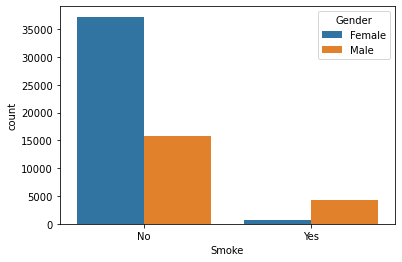

In [40]:
# Let's visualize Gender vs. Smoking Behavior
sns.countplot(data = q_03_data, x = 'Smoke', hue  = 'Gender')


In [41]:
# Let's build a Binary Logistic Regression Model (i.e. a Binary Classification Model)

# Generate Dummys for Gender
# gender_dummy = pd.get_dummies(data.gender) 

## split dataset in features and target variable
feature_cols = ['gender']
X = data[feature_cols] # Features
y = data.smoke # Target variable

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Perform prediction on the test set
y_pred = logreg.predict(X_test)

In [42]:
# Model Evaluation using Confusion Matrix
## import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print("Diagonal elements (accurate predictions). Non-diagonal elements (inaccurate predictions).")
cnf_matrix

Confusion Matrix:
Diagonal elements (accurate predictions). Non-diagonal elements (inaccurate predictions).


array([[13205,     0],
       [ 1310,     0]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

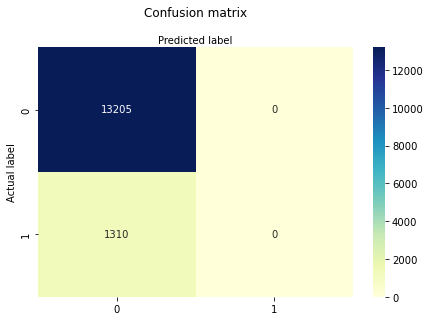

In [43]:
# Visualizing Confusion Matrix using Heatmap
## import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

## create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu" ,fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
# Confusion Matrix Evaluation Metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9097485359972443
Precision: 0.0
Recall: 0.0


### Question 04
How tall are the tallest 1% of the people?

For this question, we need to set a measure of "how tall is X". We could use the mean, but after looking at the data, we noticed that the tallest 1% all have will use summary statistics to answer this question.

**ANSWER: 180 cm**

In [45]:
# Calculate the mean of the tallest 1%

## Find threshold for the tallest 1%, i.e., find the 99th percentile
height_perc_99 = data.height.quantile(0.99)
print("The tallest person has: " + str(data.height.max()) + " cm.")
print("The smallest height for the top 1% of tallest people is: " + str(height_perc_99))
print("There are " + str(data.height[data.height >= height_perc_99].count()) + " people who 180 cm tall or taller.")

The tallest person has: 180.0 cm.
The smallest height for the top 1% of tallest people is: 180.0
There are 751 people who 180 cm tall or taller.


### Question 05
Which two features have the highest spearman rank correlation?

**Answer: (ap_hi, ap_lo) = 0.696626** 


In [46]:
# from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
my_r = data.corr(method = "spearman").abs().unstack().sort_values(ascending = False).drop_duplicates(keep = False)
print(my_r)



Series([], dtype: float64)


In [47]:
# data.corr(method = "spearman").unstack().sort_values().drop_duplicates()

print("Top 2 Absolute Correlations")
print(get_top_abs_correlations(data, 1))

Top 2 Absolute Correlations
ap_hi  ap_lo    0.696626
dtype: float64


### Question 06
What percentage of people are more than 2 standard deviations far from the average height?

Note: I am going to get how many people are 2 standard deviations **_away_** from the mean. 

**Answer: 3.31%** 

In [48]:
# Get Summary Statistics for Height within 2 standard deviations 
data.height.describe()

n_counts    = data.height.describe()[0]
height_mean = data.height.describe()[1]
height_std  = data.height.describe()[2]
lower_bound = height_mean - 2 * height_std
upper_bound = height_mean + 2 * height_std
answer_06 = data['height'][ (data['height'] <= lower_bound) | (data['height'] >= upper_bound)].count()/n_counts

print("{:.2%}".format(answer_06) + " of people's heights are 2 std. dev. away from their mean height.")



3.31% of people's heights are 2 std. dev. away from their mean height.


### Question 07
What percentage of the population over 50 years old consume alcohol? Also use the cardio_alco.csv and merge the datasets on ID. Ignore those persons, where we have no alcohol consumption information.

**Answer: 4.75%** 

In [49]:
# Check Alcohol Behavior Dataset
print(data_alc.head())

# Merge Cardio Base Data with Alcohol Behavior Dataset on the left (only merge those who are in both tables)
data_merged = data.merge(data_alc, on = ['id'], how = 'inner')

print (data_merged.head())

   id  alco
0  44     0
1  45     0
2  46     0
3  47     0
4  49     0
       id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  \
0  2474.0  39.0       1   168.0    60.0  120.0   80.0            1      0   
1  2477.0  48.0       2   178.0    70.0  120.0   80.0            1      0   
2  2478.0  59.0       1   164.0    66.0  160.0   90.0            2      0   
3  2480.0  57.0       1   158.0    68.0  160.0  100.0            2      0   
4  2482.0  54.0       2   173.0    80.0  130.0   80.0            1      0   

   alco  
0     0  
1     0  
2     0  
3     0  
4     0  


In [50]:
# First, let's label again those over 50
## Create ranges for categories
label_ranges_07 = [0, 50, 69]
label_names_07  = ['Age <= 50', 'Age > 50']

## Create new column with collapsed categories
data_merged['partition_50_merged'] = pd.cut(data_merged['age'], bins = label_ranges_07, labels = label_names_07)

## Check if age groups makes sense
data_merged[['age', 'partition_50_merged']].sample(5)

,age,partition_50_merged
33394,53.0,Age > 50
18739,61.0,Age > 50
10029,59.0,Age > 50
6037,60.0,Age > 50
4556,53.0,Age > 50


In [51]:
# Calculate the Percentage of People Over 50 that consumes alcohol
alc_over_50 = data_merged.alco[data_merged['partition_50_merged'] == 'Age > 50'].mean()

print("{:.2%}".format(alc_over_50) + " of people over 50 consume alcohol.")

4.75% of people over 50 consume alcohol.


### Question 08
Which of the following statements is true with 95% confidence?
* a) Smokers have higher blood pressure than non-smokers: **YES**
* b) Smokers have higher cholesterol level than non smokers: **NO**
* c) Smokers weight less than non smokers: **NO**
* d) Men have higher blood pressure than women: **YES**

To answer these questions, we need to work under a certain framework: 
* We need to define what High Blood Pressure means. I followed the High Blood Pressure reference from the [American Heart Association](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)
* We need to choose a Hypothesis Tests, in this case, a test for differences between means or proportions among the cited groups.

[Assumption] Suppose that Gender = 1 means _Female_ and Smoke = 0 means _Do not Smoke_

[Considerations] Due to time constraints, I will skip the following:
* Checking whether there are normality assumptions for the underlying distribution (depending on the Hypothesis Testing procedure).
* Checking for equal/unequal variance when conducting t-tests.

In [52]:
# Define High Blood Pressure
def high_bp(ap_hi, ap_lo):
    if ap_hi >= 130 or ap_lo > 80:
        ap_hi = 1
    else:
        ap_hi = 0
    return ap_hi

data['high_bp'] = data.apply(lambda x: high_bp(x['ap_hi'], x['ap_lo']), axis = 1)

data[['ap_hi', 'ap_lo','high_bp']].sample(5)

,ap_hi,ap_lo,high_bp
53918,100.0,60.0,0
7483,110.0,70.0,0
57677,130.0,80.0,1
61113,110.0,80.0,0
25905,150.0,90.0,1


In [53]:
data['smoke'].value_counts()

0    53059
1     4998
Name: smoke, dtype: int64

In [58]:
# a) Smoke vs. Blood Pressure

# Define samples
smoker_high_bp    = data[data['smoke'] == 0]['high_bp']
nonsmoker_high_bp = data[data['smoke'] == 1]['high_bp']

# Look at High Blood Pressure Proportions by Smoking Behavior
dict_08_a = {'high_bp' : 'mean'}
print(data.groupby('smoke').agg(dict_08_a).reset_index())

# Hypothesis Test for Differences in Proportions (Right-tail test)
# H_0: The average high blood pressure for smokers is the same for nonsmokers. (mean_high_bp_smoker = mean_high_bp_nonsmoker)
# H_A: The average high blood pressure for smokers is higher than nonsmokers.  (mean_high_bp_nonsmoker < mean_high_bp_smoker)

t_stat, p_value = stats.ttest_ind(nonsmoker_high_bp, smoker_high_bp, alternative = 'greater')
one_tailed_p_value = float("{:.6f}".format(p_value))

print(f't = {t_stat}, p = {p_value}')

alpha = 0.05
if one_tailed_p_value <= alpha:
    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0.
So we conclude that the average high blood pressure for smokers is higher than nonsmokers, i.e., mean_high_bp_smoker > mean_high_bp_nonsmoker at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. 

So we conclude that the average high blood pressure for smokers is the same for nonsmokers, i.e., mean_high_bp_smoker = mean_high_bp_nonsmoker at %.2f level of significance.'''%alpha)

   smoke   high_bp
0      0  0.411975
1      1  0.461585
t = 6.804386527767794, p = 5.123090740293953e-12
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0.
So we conclude that the average high blood pressure for smokers is higher than nonsmokers, i.e., mean_high_bp_smoker > mean_high_bp_nonsmoker at 0.05 level of significance.


In [63]:
# b) Smoke vs. Cholesterol

# Define samples
smoker_cholesterol    = data[data['smoke'] == 0]['cholesterol']
nonsmoker_cholesterol = data[data['smoke'] == 1]['cholesterol']

# Look at High Blood Pressure Proportions by Smoking Behavior
dict_08_b = {'cholesterol' : 'mean'}
print(data.groupby('smoke').agg(dict_08_b).reset_index())

# Hypothesis Test for Differences in Proportions (Right-tail test)
# H_0: The average cholesterol for smokers is the same for nonsmokers. (mean_cholesterol_smoker = mean_cholesterol_nonsmoker)
# H_A: The average cholesterol for smokers is higher than nonsmokers.  (mean_cholesterol_nonsmoker < mean_cholesterol_smoker)

t_stat, p_value = stats.ttest_ind(nonsmoker_cholesterol, smoker_cholesterol, alternative = 'greater')
one_tailed_p_value = float("{:.6f}".format(p_value))

print(f't = {t_stat}, p = {p_value}')

alpha = 0.05
if one_tailed_p_value <= alpha:
    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0.
So we conclude that the average cholesterol for smokers is higher than nonsmokers, i.e., mean_cholesterol_smoker > mean_cholesterol_nonsmoker at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. 

So we conclude that the average cholesterol for smokers is the same for nonsmokers, i.e., mean_cholesterol_smoker = mean_cholesterol_nonsmoker at %.2f level of significance.'''%alpha)

   smoke  cholesterol
0      0     1.353324
1      1     1.362545
t = 0.9272493396971994, p = 0.1769004727560144
Conclusion n Since p-value(=0.176900) > alpha(=0.05) We do not reject the null hypothesis H0. 

So we conclude that the average cholesterol for smokers is the same for nonsmokers, i.e., mean_cholesterol_smoker = mean_cholesterol_nonsmoker at 0.05 level of significance.


In [64]:
# c) Smoke vs. Weight

# Define samples
smoker_weight    = data[data['smoke'] == 0]['weight']
nonsmoker_weight = data[data['smoke'] == 1]['weight']

# Look at High Blood Pressure Proportions by Smoking Behavior
dict_08_c = {'weight' : 'mean'}
print(data.groupby('smoke').agg(dict_08_c).reset_index())

# Hypothesis Test for Differences in Proportions (Right-tail test)
# H_0: The average weight for smokers is the same for nonsmokers. (mean_weight_smoker = mean_weight_nonsmoker)
# H_A: The average weight for smokers is higher than nonsmokers.  (mean_weight_nonsmoker > mean_weight_smoker)

t_stat, p_value = stats.ttest_ind(smoker_weight, nonsmoker_weight, alternative = 'greater')
one_tailed_p_value = float("{:.6f}".format(p_value))

print(f't = {t_stat}, p = {p_value}')

alpha = 0.05
if one_tailed_p_value <= alpha:
    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0.
So we conclude that the average weight for smokers is higher than nonsmokers, i.e., mean_weight_smoker < mean_weight_nonsmoker at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. 

So we conclude that the average weight for smokers is the same for nonsmokers, i.e., mean_weight_smoker = mean_weight_nonsmoker at %.2f level of significance.'''%alpha)

   smoke     weight
0      0  73.302591
1      1  75.654842
t = -13.443179925848893, p = 1.0
Conclusion n Since p-value(=1.000000) > alpha(=0.05) We do not reject the null hypothesis H0. 

So we conclude that the average weight for smokers is the same for nonsmokers, i.e., mean_weight_smoker = mean_weight_nonsmoker at 0.05 level of significance.


In [66]:
# d) Gender vs. Blood Pressure

# Define samples
men_high_bp    = data[data['gender'] == 1]['high_bp']
women_high_bp  = data[data['gender'] == 2]['high_bp']

# Look at High Blood Pressure Proportions by Smoking Behavior
dict_08_d = {'high_bp' : 'mean'}
print(data.groupby('gender').agg(dict_08_d).reset_index())

# Hypothesis Test for Differences in Proportions (Right-tail test)
# H_0: The average high blood pressure for men is the same for women. (mean_high_bp_men = mean_high_bp_women)
# H_A: The average high blood pressure for men is higher than women.  (mean_high_bp_women < mean_high_bp_men)

t_stat, p_value = stats.ttest_ind(women_high_bp, men_high_bp, alternative = 'greater')
one_tailed_p_value = float("{:.6f}".format(p_value))

print(f't = {t_stat}, p = {p_value}')

alpha = 0.05
if one_tailed_p_value <= alpha:
    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0.
So we conclude that the average high blood pressure for men is higher than women, i.e., mean_high_bp_men > mean_high_bp_women at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. 

So we conclude that the average high blood pressure for men is the same for women, i.e., mean_high_bp_men = mean_high_bp_women at %.2f level of significance.'''%alpha)

   gender   high_bp
0       1  0.406238
1       2  0.435063
t = 6.710518866220628, p = 9.785435795023342e-12
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0.
So we conclude that the average high blood pressure for men is higher than women, i.e., mean_high_bp_men > mean_high_bp_women at 0.05 level of significance.
